../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv: 1 failed experiments using turbo.gpu.release have been removed (the faulty experiments have been stored in failed_turbo.gpu.release-v1.2.8-mzn2024.csv).
Number of instances: 94
average_preprocessing_time=14.45
median_preprocessing_time=0.59
stddev_preprocessing_time=59.66


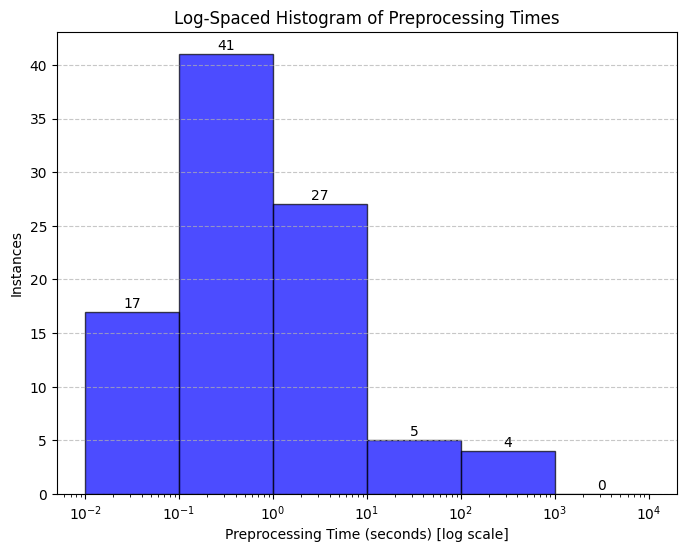

KeyError: "None of [Index(['num_op_max', 'num_op_eq', 'num_op_reified_eq', 'num_op_mul',\n       'num_op_leq', 'num_op_neq', 'num_op_emod', 'num_op_add',\n       'num_op_reified_leq', 'num_op_ediv', 'num_op_gt', 'num_op_min'],\n      dtype='object')] are in the [columns]"

In [1]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv",
  "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv"
])
df = df[df['uid'] == "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0"]

mzn_challenge = pd.read_csv("../benchmarking/mzn2024.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

# Instances that might have been solved during flattening.
df = df[~(df['nodes'].isna())]

# Print the number of rows
print(f"Number of instances: {df.shape[0]}")

analysis.preprocessing_time_distribution(df)
# analysis.analyse_tnf_per_problem(df, False, 'parsed_variables', 'parsed_constraints', 'variables_after_simplification', 'constraints_after_simplification')
analysis.heatmap_operators(df)

choco = analysis.read_experiments([
  "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv"
])
choco = choco[choco['model_data_file'].isin(mzn_data)]
choco = choco.drop_duplicates(subset='model_data_file', keep='first')
choco.rename(columns={'variables': 'choco_vars', 'constraints': 'choco_cons'}, inplace=True)
df = df.merge(choco[['model_data_file', 'choco_vars', 'choco_cons']], on='model_data_file', how='left')

analysis.boxplot_tcn_increase(df, 'choco_vars', 'choco_cons')
analysis.boxplot_preprocessing_components(df, ['eliminated_entailed_constraints', 'eliminated_equality_constraints', 'eliminated_constraints_by_icse'])

analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'parsed_variables', 'parsed_constraints')
analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'tnf_variables', 'tnf_constraints')
analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons','variables_after_simplification', 'constraints_after_simplification')
